In [1]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
twitter=pd.read_excel('file:///E:/Data%20Science/twitter%20(1).xlsx')

In [5]:
twitter.head()

,User_Name,Tweet_Created,Tweet,Tweet 2,Tweet 3,Tweet 4,css-901oao 8,css-901oao 9,css-4rbku5 href 4,css-9pa8cd src 2,...,css-4rbku5 2,css-4rbku5 href 7,css-4rbku5 3,css-4rbku5 href 8,css-4rbku5 4,css-4rbku5 7,css-4rbku5 href 9,r-1p0dtai src,css-4rbku5 9,css-4rbku5 href 13
0,See top Tweets about these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Automotive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@EvaFoxU,7h,India,is trying to say that,Tesla,itself is to blame for not receiving EV benefi...,Tesla,'s main request,https://t.co/XpMVApqsR9,https://pbs.twimg.com/card_img/149369453718472...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@KSingh_1469,Feb 10,Tesla,How is this the Indian government’s fault? Why...,India,is free to set up production in,Replying to @TeslaClubIN,NaN,NaN,https://pbs.twimg.com/profile_images/144459690...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,@MeghBulletin,Feb 10,India,UM Nitin Gadkari:,India,is welcome in,https://,but manufacturing cars in China & selling them...,NaN,NaN,...,#Tesla,https://twitter.com/hashtag/Tesla?src=hashtag_...,moneycontrol.com/news/business/,https://t.co/hSZEmV4JxK,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
twitter.columns

Index(['User_Name', 'Tweet_Created', 'Tweet', 'Tweet 2', 'Tweet 3', 'Tweet 4',
       'css-901oao 8', 'css-901oao 9', 'css-4rbku5 href 4', 'css-9pa8cd src 2',
       'css-4rbku5 href 5', 'css-901oao 10', 'css-901oao 11', 'css-901oao 12',
       'css-901oao 13', 'css-901oao 14', 'css-901oao 15', 'css-4rbku5 href 6',
       'css-4rbku5 2', 'css-4rbku5 href 7', 'css-4rbku5 3',
       'css-4rbku5 href 8', 'css-4rbku5 4', 'css-4rbku5 7',
       'css-4rbku5 href 9', 'r-1p0dtai src', 'css-4rbku5 9',
       'css-4rbku5 href 13'],
      dtype='object')

In [12]:
twitter=twitter.rename({'css-901oao 8':'Tweet5','css-901oao 9':'Tweet6'},axis=1)

In [18]:
twitter=twitter.drop(delcol,1)

In [19]:
twitter.columns

Index(['User_Name', 'Tweet_Created', 'Tweet', 'Tweet 2', 'Tweet 3', 'Tweet 4',
       'Tweet5', 'Tweet6', 'tweets'],
      dtype='object')

In [20]:
delcol=['css-4rbku5 href 4', 'css-9pa8cd src 2',
       'css-4rbku5 href 5', 'css-901oao 10', 'css-901oao 11', 'css-901oao 12',
       'css-901oao 13', 'css-901oao 14', 'css-901oao 15', 'css-4rbku5 href 6',
       'css-4rbku5 2', 'css-4rbku5 href 7', 'css-4rbku5 3',
       'css-4rbku5 href 8', 'css-4rbku5 4', 'css-4rbku5 7',
       'css-4rbku5 href 9', 'r-1p0dtai src', 'css-4rbku5 9',
       'css-4rbku5 href 13']

In [21]:
twitter['tweets']=twitter['Tweet']+twitter['Tweet 2']+twitter['Tweet 3']+twitter['Tweet5']+twitter['Tweet6']

In [22]:
twitter.head()

,User_Name,Tweet_Created,Tweet,Tweet 2,Tweet 3,Tweet 4,Tweet5,Tweet6,tweets
0,See top Tweets about these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Automotive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@EvaFoxU,7h,India,is trying to say that,Tesla,itself is to blame for not receiving EV benefi...,Tesla,'s main request,Indiais trying to say thatTeslaTesla's main re...
3,@KSingh_1469,Feb 10,Tesla,How is this the Indian government’s fault? Why...,India,is free to set up production in,Replying to @TeslaClubIN,NaN,NaN
4,@MeghBulletin,Feb 10,India,UM Nitin Gadkari:,India,is welcome in,https://,but manufacturing cars in China & selling them...,IndiaUM Nitin Gadkari:Indiahttps://but manufac...


In [23]:
delcol2=['Tweet', 'Tweet 2', 'Tweet 3', 'Tweet 4',
       'Tweet5', 'Tweet6']

In [24]:
twitter=twitter.drop(delcol2,1)

In [26]:
twitter.head(50)

,User_Name,Tweet_Created,tweets
0,See top Tweets about these,NaN,NaN
1,Automotive,NaN,NaN
2,@EvaFoxU,7h,Indiais trying to say thatTeslaTesla's main re...
3,@KSingh_1469,Feb 10,NaN
4,@MeghBulletin,Feb 10,IndiaUM Nitin Gadkari:Indiahttps://but manufac...
5,@qz,Feb 9,NaN
6,NaN,NaN,NaN
7,@TeslaClubIN,@NCBirbhan,NaN
8,@TeslaChillMode,@mortchad,NaN
9,@BoycottHegemony,Feb 10,"India""Modi gov informed parliament that there ..."


In [27]:
twitter=twitter.dropna()

In [28]:
twitter.head()

,User_Name,Tweet_Created,tweets
2,@EvaFoxU,7h,Indiais trying to say thatTeslaTesla's main re...
4,@MeghBulletin,Feb 10,IndiaUM Nitin Gadkari:Indiahttps://but manufac...
9,@BoycottHegemony,Feb 10,"India""Modi gov informed parliament that there ..."
11,@teamnegotium,Feb 8,TESLAGOVERNMENT TAKES DIG ATTeslaIndiaout on t...
15,@AmanKayamHai_,Feb 11,TeslaExclusive | MinisterIndiaFromon


In [31]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 2 to 113
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Name      30 non-null     object
 1   Tweet_Created  30 non-null     object
 2   tweets         30 non-null     object
dtypes: object(3)
memory usage: 960.0+ bytes


# Sentiment Analysis

In [32]:
import pandas as pd
positivewords=pd.read_table("E:/Data Science/Ivy Python & Machine Learning,Deep Learning/Python Datasets/Sentiment Analysis Words/Positive_words.txt")
negetivewords=pd.read_table("E:/Data Science/Ivy Python & Machine Learning,Deep Learning/Python Datasets/Sentiment Analysis Words/Negative_words.txt")


In [37]:
def ComputeSentimentScore(inputSentence):
    import re
    PositiveScore=0
    NegativeScore=0
    OverallSentiment=''
    newSentence=inputSentence.lower()
    WordList= re.sub(r'[^a-z A-Z]',r'',newSentence)
    WordList=WordList.split()
    #NList=[]
    #PList=[]
    for newWord in WordList:
        if (newWord in negetivewords.values):
            
            #NList.append(newWord)
            NegativeScore+=1
           
        if (newWord in positivewords.values):
            
            #PList.append(newWord)
            PositiveScore+=1
    print('Final Positive Score:',PositiveScore)
    print('Final Negative Score:',NegativeScore)
    print('Overall Score:',PositiveScore-NegativeScore)
    #print(NList)
    #print(PList)
    
    if((PositiveScore-NegativeScore) > 0):
        OverallSentiment='Positive Reviews'
    
    elif((PositiveScore-NegativeScore) == 0):
        OverallSentiment='Neutral Reviews'
    
    else:
        OverallSentiment='Negative Reviews'
        
    return(OverallSentiment)

In [38]:
twitter['Sentiment']=twitter['tweets'].apply(ComputeSentimentScore)

Final Positive Score: 0
Final Negative Score: 0
Overall Score: 0
Final Positive Score: 0
Final Negative Score: 0
Overall Score: 0
Final Positive Score: 0
Final Negative Score: 0
Overall Score: 0
Final Positive Score: 0
Final Negative Score: 1
Overall Score: -1
Final Positive Score: 0
Final Negative Score: 0
Overall Score: 0
Final Positive Score: 0
Final Negative Score: 0
Overall Score: 0
Final Positive Score: 0
Final Negative Score: 0
Overall Score: 0
Final Positive Score: 0
Final Negative Score: 0
Overall Score: 0
Final Positive Score: 0
Final Negative Score: 0
Overall Score: 0
Final Positive Score: 1
Final Negative Score: 0
Overall Score: 1
Final Positive Score: 0
Final Negative Score: 1
Overall Score: -1
Final Positive Score: 1
Final Negative Score: 0
Overall Score: 1
Final Positive Score: 1
Final Negative Score: 0
Overall Score: 1
Final Positive Score: 0
Final Negative Score: 0
Overall Score: 0
Final Positive Score: 0
Final Negative Score: 0
Overall Score: 0
Final Positive Score: 1

In [40]:
twitter[['tweets', 'Sentiment']].head(10)

,tweets,Sentiment
2,Indiais trying to say thatTeslaTesla's main re...,Neutral Reviews
4,IndiaUM Nitin Gadkari:Indiahttps://but manufac...,Neutral Reviews
9,"India""Modi gov informed parliament that there ...",Neutral Reviews
11,TESLAGOVERNMENT TAKES DIG ATTeslaIndiaout on t...,Negative Reviews
15,TeslaExclusive | MinisterIndiaFromon,Neutral Reviews
18,"TESLA< FORD \n ""Make inIndiaIndia.",Neutral Reviews
20,IndiaIn0:4924 viewsNow only,Neutral Reviews
22,IndiaFirst Make InIndiaTeslaTells,Neutral Reviews
28,TeslaCan't have a situation where jobs are in ...,Neutral Reviews
34,Teslais welcome inIndiaIndiais “not a digestib...,Positive Reviews


<AxesSubplot:ylabel='None'>

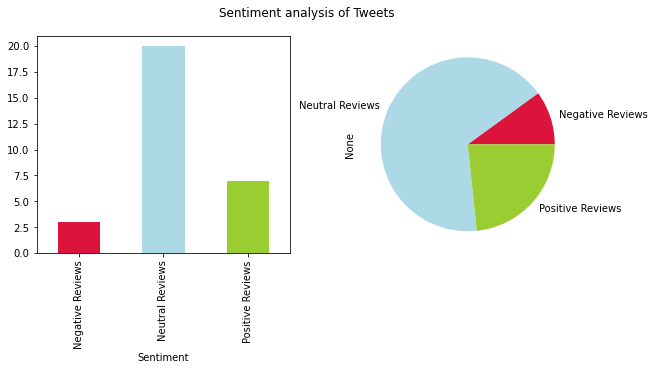

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Tweets")

GroupedData=twitter.groupby('Sentiment').size()
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue','yellowgreen'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue','yellowgreen'])

# NLP

In [80]:
from textblob import TextBlob
def NLP_Sentiment(inpSentence):
    blob=TextBlob(inpSentence)
    SentimentScore=blob.sentiment[0]
    overallsentiment=''
    
    if(SentimentScore<0):
        overallsentiment='Negative Reviews'
    elif(SentimentScore>0.3):
        overallsentiment='Positive Reviews'
    else:
        overallsentiment='Neutral Reviews'
    return(overallsentiment)

In [81]:
NLP_Sentiment(Tweets_String)

'Neutral Reviews'

# Wordcloud analysis

In [45]:
Tweets=twitter['tweets'].values
Tweets_String=str(Tweets)

In [51]:
print(Tweets_String)

["Indiais trying to say thatTeslaTesla's main request"
 'IndiaUM Nitin Gadkari:Indiahttps://but manufacturing cars in China & selling them here in'
 'India"Modi gov informed parliament that there cannot be a situation where the \'market isTeslaIndiawants to sell in'
 'TESLAGOVERNMENT TAKES DIG ATTeslaIndiaout on their wrong policy of having market in'
 'TeslaExclusive | MinisterIndiaFromon'
 'TESLA< FORD \n "Make inIndiaIndia.' 'IndiaIn0:4924 viewsNow only'
 'IndiaFirst Make InIndiaTeslaTells'
 "TeslaCan't have a situation where jobs are in China: Govt onIndiahttp://entry"
 'Teslais welcome inIndiaIndiais “not a digestible concept",'
 "IndiaNo offence pls - Can't have a situation where market isTeslahttps://Download Economic Times App to stay updated with Business News -"
 "Watch againGovt's strong message to0:00353 viewsand jobs in"
 'IndiaAnd you have promised to serve such a govt inTeslaIndiaautomotive ansd Sell in'
 "IndiaCan't have a situation where market isTeslahttps://Download 

In [50]:
import re
Tweets_String_Cleaned=Tweets_String.lower()
Tweets_String_Cleaned=re.sub(r'@\w+', ' ', Tweets_String_Cleaned)
Tweets_String_Cleaned=re.sub(r'http\S+', ' ', Tweets_String_Cleaned)
Tweets_String_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweets_String_Cleaned)
Tweets_String_Cleaned= re.sub(r'\b\w{1,3}\b', ' ', Tweets_String_Cleaned)
Tweets_String_Cleaned= re.sub(r' +', ' ', Tweets_String_Cleaned)
Tweets_String_Cleaned

' indiais trying thatteslatesla main request indiaum nitin gadkari india manufacturing cars china selling them here india modi informed parliament that there cannot situation where market isteslaindiawants sell teslagovernment takes atteslaindiaout their wrong policy having market teslaexclusive ministerindiafromon tesla ford make inindiaindia indiain viewsnow only indiafirst make inindiateslatells teslacan have situation where jobs china govt onindia teslais welcome inindiaindiais digestible concept indiano offence have situation where market istesla economic times stay updated with business news watch againgovt strong message viewsand jobs indiaand have promised serve such govt inteslaindiaautomotive ansd sell indiacan have situation where market istesla economic times stay updated with business news teslaindian govt onindiateslabut jobs created china minister heavy industries krishan gurjar told loksabha that relaxations will given teslais welcome inindiaindiais digestible concept u

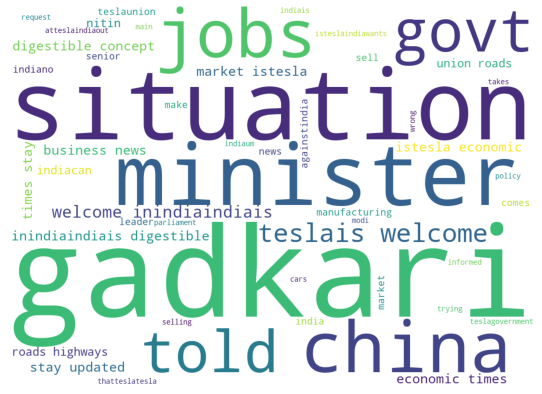

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

customStopwords=list(STOPWORDS) 

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720,background_color='white'
                          ).generate(Tweets_String_Cleaned)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

The Sentiment of the text is Sentiment(polarity=0.29333333333333333, subjectivity=0.5977777777777777)


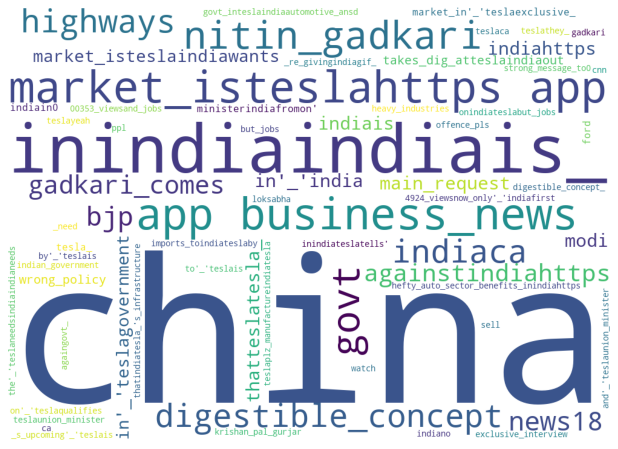

In [55]:
from textblob import TextBlob


SampleTextInBlobFormat = TextBlob(Tweets_String)
NounPhrases=SampleTextInBlobFormat.noun_phrases
print('The Sentiment of the text is',SampleTextInBlobFormat.sentiment)
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))

NewNounString=' '.join(NewNounList)
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

customStopwords1=list(STOPWORDS)

wordcloudimage = WordCloud( max_words=80,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords1,
                            background_color='white',
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

Indians are welcomed Elon Musk Tesla Launch Intiative.Most of the tweets in last two months people dont have any problem with tesla model
rather China is the main concern for the negative tweets but people also want tesla should start manufacturing tesla in INDIA LAND.